# Customer Analytics in FMGC Industry (Part-2)

### 1. Importing the libraries

In [185]:
import warnings
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

sns.set()
plt.rc("font", size=14)
warnings.filterwarnings("ignore")
pd.set_option('display.max_column',None)
sns.set(style="whitegrid", color_codes=True)

### 2. Importing the data

In [145]:
purchase_df = pd.read_csv("/Users/mac/Desktop/DataScience/Pojects_ds/Customer Analytics FMCG/purchase data.csv")

In [146]:
purchase_df.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0


### 3. EDA/Knowing about the data

In [147]:
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58693 entries, 0 to 58692
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 58693 non-null  int64  
 1   Day                58693 non-null  int64  
 2   Incidence          58693 non-null  int64  
 3   Brand              58693 non-null  int64  
 4   Quantity           58693 non-null  int64  
 5   Last_Inc_Brand     58693 non-null  int64  
 6   Last_Inc_Quantity  58693 non-null  int64  
 7   Price_1            58693 non-null  float64
 8   Price_2            58693 non-null  float64
 9   Price_3            58693 non-null  float64
 10  Price_4            58693 non-null  float64
 11  Price_5            58693 non-null  float64
 12  Promotion_1        58693 non-null  int64  
 13  Promotion_2        58693 non-null  int64  
 14  Promotion_3        58693 non-null  int64  
 15  Promotion_4        58693 non-null  int64  
 16  Promotion_5        586

In [148]:
#checking for any null values
purchase_df.isnull().mean()

ID                   0.0
Day                  0.0
Incidence            0.0
Brand                0.0
Quantity             0.0
Last_Inc_Brand       0.0
Last_Inc_Quantity    0.0
Price_1              0.0
Price_2              0.0
Price_3              0.0
Price_4              0.0
Price_5              0.0
Promotion_1          0.0
Promotion_2          0.0
Promotion_3          0.0
Promotion_4          0.0
Promotion_5          0.0
Sex                  0.0
Marital status       0.0
Age                  0.0
Education            0.0
Income               0.0
Occupation           0.0
Settlement size      0.0
dtype: float64

In [149]:
#checking for duplicated values
purchase_df.duplicated().sum()

0

In [150]:
purchase_df.shape

(58693, 24)

In [151]:
purchase_df['Brand'].unique()

array([0, 2, 5, 1, 4, 3])

> There are about 58,693 records with 24 features in the dataset. There are no null or duplicate values. The explanation of each feature is as follows: 
>- ID (numerical): a unique identifier of a customer.	
>- Day	(numerical) when the customer has visited the store.  				
>- Incidence	(categorical) Purchase Incidence. Did the customer purchase a product?
		0	The customer has not purchased an item from the category of interest 	
		1	The customer has purchased an item from the category of interest 	
>- Brand	(categorical) Shows which brand the customer has purchased.	
                0	No brand was purchased	
		1,2,3,4,5	Chocolate Product Brand ID					
>- Quantity	(numerical)	Number of items bought by the customer from the product category of interest	
>- Last_Inc_Brand	(categorical)	Shows which brand the customer has purchased on their previous store visit	
                0	No brand was purchased	
		1,2,3,4,5	Chocolate Product Brand ID	
>- Last_Inc_Quantity (numerical)	Number of items bought by the customer from the product category of interest during their previous store visit.					
>- Price_1,2,3,4,5	(numerical)	Price of an item from Brand 1,2,3,4,5 on a particular day	
>- Promotion_1,2,3,4,5 (categorical) Indicator whether Brand 1,2,3,4,5 was on promotion or not on a particular day	
> Rest features (Sex, Marital status, Age, Education, Income, Occupation, Settlement size) are consistent with the features in demographic dataset. 

### 4. Importing the Segmentation Model


In [152]:
scaler = pickle.load(open('/Users/mac/Desktop/DataScience/Pojects_ds/Customer Analytics FMCG/scaler.pickle','rb'))
pca = pickle.load(open('/Users/mac/Desktop/DataScience/Pojects_ds/Customer Analytics FMCG/pca.pickle','rb'))
kmeans_pca = pickle.load(open('/Users/mac/Desktop/DataScience/Pojects_ds/Customer Analytics FMCG/kmeans_pca.pickle','rb'))

In [153]:
#checking the col age and income if they are normally distribted or not
purchase_df['Age'].skew()

0.7231417784851322

In [154]:
purchase_df['Income'].skew()

1.4248712824917125

In [155]:
#making both of these cols as normal first by doing log normal transformation
purchase_df['age_log'] = np.log(purchase_df['Age'])
purchase_df['income_log'] = np.log(purchase_df['Income'])

In [156]:
purchase_df.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,age_log,income_log
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0,0,0,47,1,110866,1,0,3.850148,11.616078
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,3.850148,11.616078
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,3.850148,11.616078
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,3.850148,11.616078
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,3.850148,11.616078


In [157]:
#standardizing the demographic features values before applying pca
features = purchase_df[['Sex','Marital status','Education','Occupation','Settlement size','age_log','income_log']]
purchase_segm_std = scaler.transform(features)

In [158]:
#pca transformation
purchase_segm_pca = pca.transform(purchase_segm_std)

In [159]:
#kmeans prediction
purchase_segm_kmneans_pca = kmeans_pca.predict(purchase_segm_pca)

In [160]:
# Checkpoint 
purchase_predictors = purchase_df.copy()

In [161]:
purchase_predictors['Segment'] = purchase_segm_kmneans_pca
purchase_predictors= purchase_predictors.reset_index()
purchase_predictors.head()

,index,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,age_log,income_log,Segment
0,0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0,0,0,47,1,110866,1,0,3.850148,11.616078,0
1,1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,3.850148,11.616078,0
2,2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,3.850148,11.616078,0
3,3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,3.850148,11.616078,0
4,4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,3.850148,11.616078,0


> Descriptive Analysis by Segments
We are going to discuss/analyse the purchases data by individuals and then by segments to gain insights into cutomer shopping habits.
>- 1.The proportion of each Segment
>- 2.Purchase Occations(Day) and Incidences:
>-- How often each segment group go to shopping and do they buy items?
>- 3.Brand Choice:What brand of products the customers purchase ?
>- 4.Revenue comparison between segments:
>-- How much money do they spend?

##### 1. Segment Proportions
- Based on the customer data fromthe customer's loyalty program,we 1stly compare the size of each segment.

In [162]:
purchase_freq = purchase_predictors[['ID','Incidence']].groupby(['ID']).sum()
traffic_freq = purchase_predictors[['ID','Incidence']].groupby(['ID']).count()
segm_info = purchase_predictors[['ID','Segment']].groupby(['ID']).mean()

traffic_freq = traffic_freq.rename(columns = {'Incidence': 'N_Visits'})
purchase_freq = purchase_freq.rename(columns = {'Incidence': 'N_Purchases'})

#average number of purchases by CustomerID
df_customer = traffic_freq.join(purchase_freq)
df_customer['Avg_N_Purchases'] = df_customer['N_Purchases']/df_customer['N_Visits']

purchase_descr = df_customer.join(segm_info)
purchase_descr = purchase_descr.sort_values(by='N_Visits',ascending=False)
purchase_descr.head()

,N_Visits,N_Purchases,Avg_N_Purchases,Segment
ID,,,,
200000187,358,327,0.913408,0.0
200000041,353,322,0.912181,0.0
200000247,347,320,0.922190,0.0
200000097,182,39,0.214286,1.0
200000297,179,126,0.703911,0.0


#### Group by each segment

In [163]:
#calculate the prop of each segment and set the appro name
segm_prop = purchase_descr[['N_Visits','Segment']].groupby(['Segment']).count() / purchase_descr.shape[0]
segm_prop = segm_prop.rename(columns = {'N_Visits': 'Segment Proportions'}).reset_index()
segm_prop['Segment'].replace({0: 'Career-Focused', 1: 'Fewer-Opportunities',   2: "Well-Off", 3:"Standard"}, inplace=True)
segm_prop.head()

,Segment,Segment Proportions
0,Career-Focused,0.294
1,Fewer-Opportunities,0.346
2,Well-Off,0.206
3,Standard,0.154


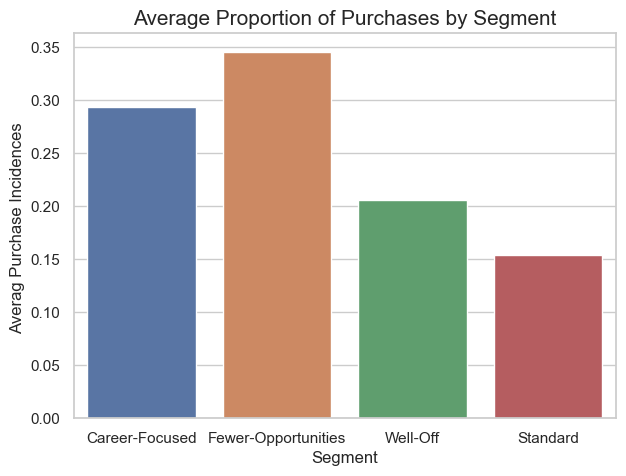

In [164]:
plt.figure(figsize=[7,5])
sns.barplot(data = segm_prop, x = 'Segment', y = 'Segment Proportions')
plt.xlabel('Segment', fontsize = 12)
plt.ylabel('Averag Purchase Incidences ', fontsize = 12)
plt.title('Average Proportion of Purchases by Segment', fontsize = 15)
plt.show()

> The largest segment is of 'Fewer-Opportunities'. Almost 40% customers belong to this segment. The second largest is of 'Career-Focused', 22% of customers are in this segment. The proportion of the other groups "Standard" and "Well-Off" are similar to ca. 20%.

##### 2.Purchase Occasions and Purchase Incidences

In [165]:
# Calculate the mean by the four segments to determine the average customer behaivour in each segment.
segments_mean = purchase_descr.groupby(['Segment']).mean().reset_index()
segments_mean.Segment.replace({0: 'Career-Focused', 1: 'Fewer-Opportunities',   2: "Well-Off", 3:"Standard"}, inplace=True)
segments_mean

,Segment,N_Visits,N_Purchases,Avg_N_Purchases
0,Career-Focused,120.625850,34.761905,0.256676
1,Fewer-Opportunities,113.959538,22.867052,0.202736
2,Well-Off,117.504854,33.990291,0.279283
3,Standard,118.740260,26.896104,0.226817


In [166]:
# Calculate the standard deviation by segments. It determines how homogoneus each of the segments is.
segments_std = purchase_descr.groupby(['Segment']).std()
segments_std

,N_Visits,N_Purchases,Avg_N_Purchases
Segment,,,
0.0,39.150257,47.271633,0.180468
1.0,17.828759,14.004971,0.121540
2.0,20.642082,25.642526,0.171166
3.0,19.731355,19.267224,0.145008


Text(0.5, 1.0, 'Average Proportion of Purchases by Segment')

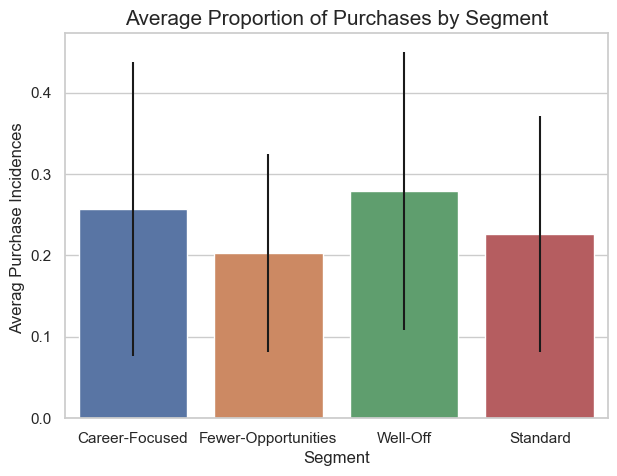

In [167]:
# Plot the average proportion of purchases.
avg_N_Purchase_in_percentage = segments_mean.Avg_N_Purchases*100
plt.figure(figsize=[7,5])
sns.barplot(data = segments_mean, x = 'Segment', y = 'Avg_N_Purchases',
              yerr = segments_std['Avg_N_Purchases'])
plt.xlabel('Segment', fontsize = 12)
plt.ylabel('Averag Purchase Incidences ', fontsize = 12)
plt.title('Average Proportion of Purchases by Segment', fontsize = 15)

##### 3. Brand Choice
Which brand is the customer going to chose? 

In [168]:
#selecting only the rows which have indice=1. This means that we are filtering out the times when purchase was made
purchase_incidence = purchase_predictors[purchase_predictors['Incidence']==1]
purchase_incidence.shape

(14638, 28)

In [169]:
brand_dummies = pd.get_dummies(purchase_incidence['Brand'],prefix='Brand',prefix_sep='_')
brand_dummies['Segment'],brand_dummies['ID'] = purchase_incidence['Segment'], purchase_incidence['ID']
brand_dummies.head()

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,0,1,0,0,0,0,200000001
11,0,0,0,0,1,0,200000001
19,1,0,0,0,0,0,200000001
24,0,0,0,1,0,0,200000001
29,0,1,0,0,0,0,200000001


In [170]:
brand_ID = brand_dummies.groupby(['Segment'],as_index=True).mean()

In [171]:
mean_brand_segment = brand_ID.groupby(['Segment'], as_index = True).mean() # group by each segment

In [172]:
mean_brand_segment

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,ID
Segment,,,,,,
0,0.049706,0.230920,0.020352,0.074755,0.624266,2.000002e+08
1,0.144085,0.580384,0.087209,0.060920,0.127401,2.000003e+08
2,0.045987,0.101114,0.024564,0.624964,0.203370,2.000003e+08
3,0.176243,0.343795,0.147755,0.056012,0.276195,2.000003e+08


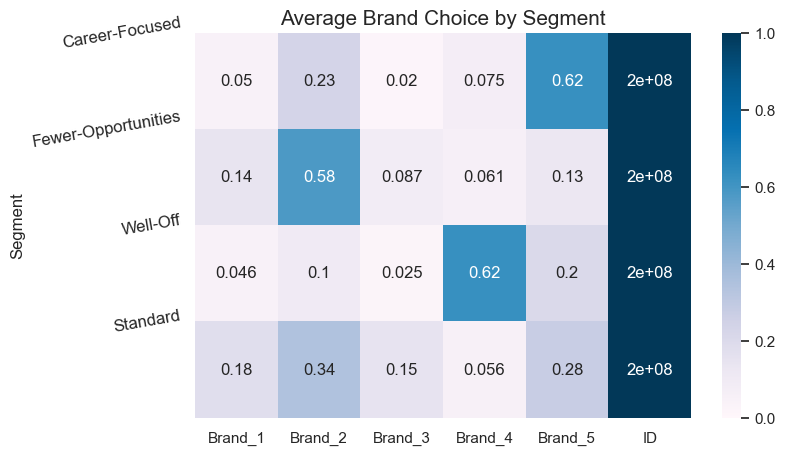

In [173]:
plt.figure(figsize=[8,5])
sns.heatmap(mean_brand_segment, vmin = 0, vmax = 1, cmap = 'PuBu', annot = True)
plt.yticks([0, 1, 2, 3], , rotation = 10, fontsize = 12)
plt.title('Average Brand Choice by Segment', fontsize = 15)['Career-Focused', 'Fewer-Opportunities', 'Well-Off', 'Standard']
plt.show()

> Note thst each chocolate brands are listed in ascending order of price. This means that brand1 is the cheapest and brand5 is the most expensive one.
>- **Fewer-Opportunities** segment shows an extremely strong preference for brand_2. Almost 70 percent of the segment chooses this brand of chocolate. Brand_2 Chocolate certainly is not the cheapest one. Thus, we can guess that the price of chocolate bars is not really matters to our customers to purchase. 
>- **Career-Focused** segment: ca. 63 percent of the career focus segment buys brand_5 which is the most expensive brand. It seems that this cluster of young ambitious career focused individuals enjoys this fancy candy bar with no additional information. It can be speculated that the career focus segment is looking for luxury status and this alone may be an opportunity to raise the price of brand 5 even further.
>- The **Well-Off** segment enjoys one of the most luxurious brands but not the most expensive one. Brand_4 is the most popularly bought brand followed by brand_5. 
>- **Standard** segment is the most heterogeneous segment. It seems that people from the standard segment prefer brand_2 and a weaker preference for brands 1 and 3. It's obvious that this segment don't like buying brand 4. Nevertheless, their preference is scattered all around. One idea could be to try to influence them to try to different brands. 

##### 4. Revenue by Segements
- Revenue is calculated by multiplying price with brand and quantity of the product bought.

In [193]:
#filtering out the brands from dataset
brand_1 = purchase_predictors[purchase_predictors['Brand']==1]
brand_2 = purchase_predictors[purchase_predictors['Brand']==2]
brand_3 = purchase_predictors[purchase_predictors['Brand']==3]
brand_4 = purchase_predictors[purchase_predictors['Brand']==4]
brand_5 = purchase_predictors[purchase_predictors['Brand']==5]

#computing the revenue of each brand
brand_1['Revenue_Brand_1'] = brand_1['Price_1'] * brand_1['Quantity']
brand_2['Revenue_Brand_2'] = brand_2['Price_2'] * brand_2['Quantity']
brand_3['Revenue_Brand_3'] = brand_3['Price_3'] * brand_3['Quantity']
brand_4['Revenue_Brand_4'] = brand_4['Price_4'] * brand_4['Quantity']
brand_5['Revenue_Brand_5'] = brand_5['Price_5'] * brand_5['Quantity']

#aggregating the revenues
brand_1_segm = brand_1.groupby('Segment')['Revenue_Brand_1'].sum()
brand_2_segm = brand_2.groupby('Segment')['Revenue_Brand_2'].sum()
brand_3_segm = brand_3.groupby('Segment')['Revenue_Brand_3'].sum()
brand_4_segm = brand_4.groupby('Segment')['Revenue_Brand_4'].sum()
brand_5_segm = brand_5.groupby('Segment')['Revenue_Brand_5'].sum()

segments_brand_revenue = pd.DataFrame({'Segment' :  ['Career-Focused', 'Fewer-Opportunities', 'Well-Off', 'Standard'] ,
                                      'Revenue_Brand_1': brand_1_segm.values, 
                                      'Revenue_Brand_2': brand_2_segm.values, 
                                      'Revenue_Brand_3': brand_3_segm.values, 
                                      'Revenue_Brand_4': brand_4_segm.values, 
                                      'Revenue_Brand_5': brand_5_segm.values})
segments_brand_revenue['Total_Rev'] = segments_brand_revenue.sum(axis=1)
segments_brand_revenue.loc[:,'Segment Proportions'] = segm_prop['Segment Proportions']

In [199]:
segments_brand_revenue = segments_brand_revenue.sort_values(by='Total_Rev',ascending=False)
segments_brand_revenue

,Segment,Revenue_Brand_1,Revenue_Brand_2,Revenue_Brand_3,Revenue_Brand_4,Revenue_Brand_5,Total_Rev,Segment Proportions
0,Career-Focused,1052.34,5244.52,615.77,2374.52,17852.07,27139.22,0.294
2,Well-Off,767.42,1811.07,723.55,14183.40,5546.54,23031.98,0.206
1,Fewer-Opportunities,2709.65,11127.92,2373.07,1534.08,2599.31,20344.03,0.346
3,Standard,1776.24,3584.80,2309.13,948.10,3623.08,12241.35,0.154


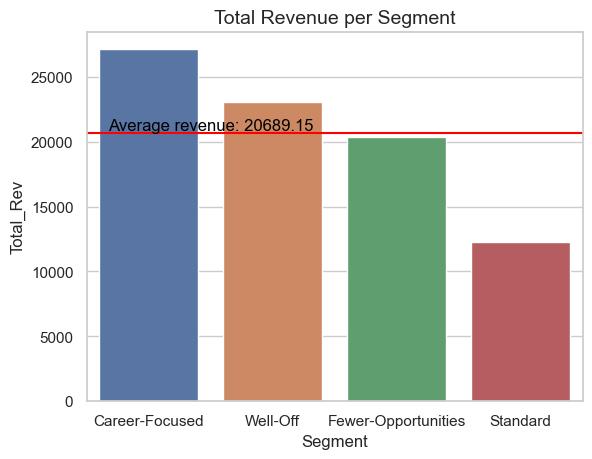

In [230]:
mean_line = segments_brand_revenue['Total_Rev'].mean()
sns.barplot(x=segments_brand_revenue['Segment'],y=segments_brand_revenue['Total_Rev'])
plt.axhline(y=mean_line, color='red', linestyle='-')
# Add the text label
plt.text(0.5, mean_line, f"Average revenue: {mean_line:.2f}", color='black', ha='center', va='bottom')
plt.title("Total Revenue per Segment", fontsize=14)
plt.show()

> 

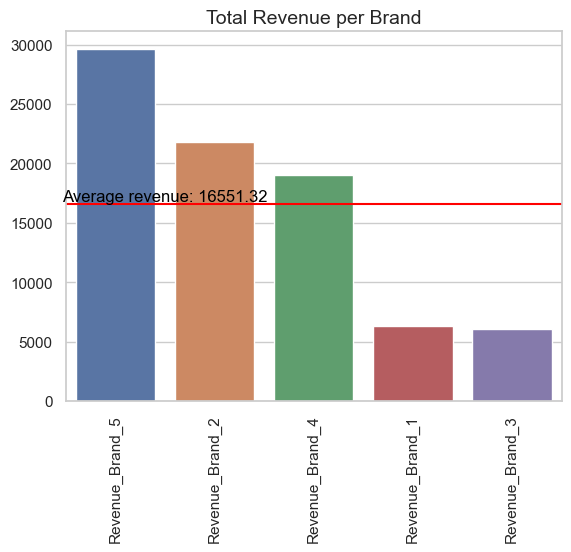

In [231]:
rev_sum = segments_brand_revenue.iloc[:,1:6].sum(axis=0)
rev_mean = rev_sum.values.mean()
#sorting the values
sorted_indices = rev_sum.values.argsort()[::-1]
sns.barplot(x=rev_sum.index[sorted_indices], y=rev_sum.values[sorted_indices])
plt.axhline(y=rev_mean, color='red', linestyle='-')
# Add the text label
plt.text(0.5, rev_mean, f"Average revenue: {rev_mean:.2f}", color='black', ha='center', va='bottom')
plt.title("Total Revenue per Brand", fontsize=14)
plt.xticks(rotation='90')
plt.show()

>- Brand 3 has the lowest revenue compared to the other products. It is the middle brand in terms of price, and its highest contributor is the "Standard" segment. Standard segment would like the first three brands, so they can be influenced to buy more of the 3rd brand. Maybe if brand 3 reduces its price it is likely that the standard segment would pivot towards it. <br><br>
>- The customers of Brand 4 seem mainly from the "Well-Off" segment. The customers in this segment who did not choose this brand bought an even more expensive alternative: Brand 5. Therefore, they seem to be loyal and not really affected by price. Therefore brand 4 could try cautiously increasing its price. The hypothesis here is they would likely retain most of its customers and increase the revenue per sale.<br></br>
>- The revenue of Brand 5,2,4 have renvenue > mean value. other brands are earning less than the mean value.<br></br>
>- Career focused and well off segments are contributing more to the revenue. While the standard segment is contributing the least. 